#### Importing Libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import  numpy as np

import warnings as wr
wr.filterwarnings('ignore')

In [2]:
heart=pd.read_csv('Heart-Disease.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart.shape

(303, 14)

In [4]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
heart.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [7]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Correlation:

In [9]:
corr = heart.corr()
corr.shape

(14, 14)

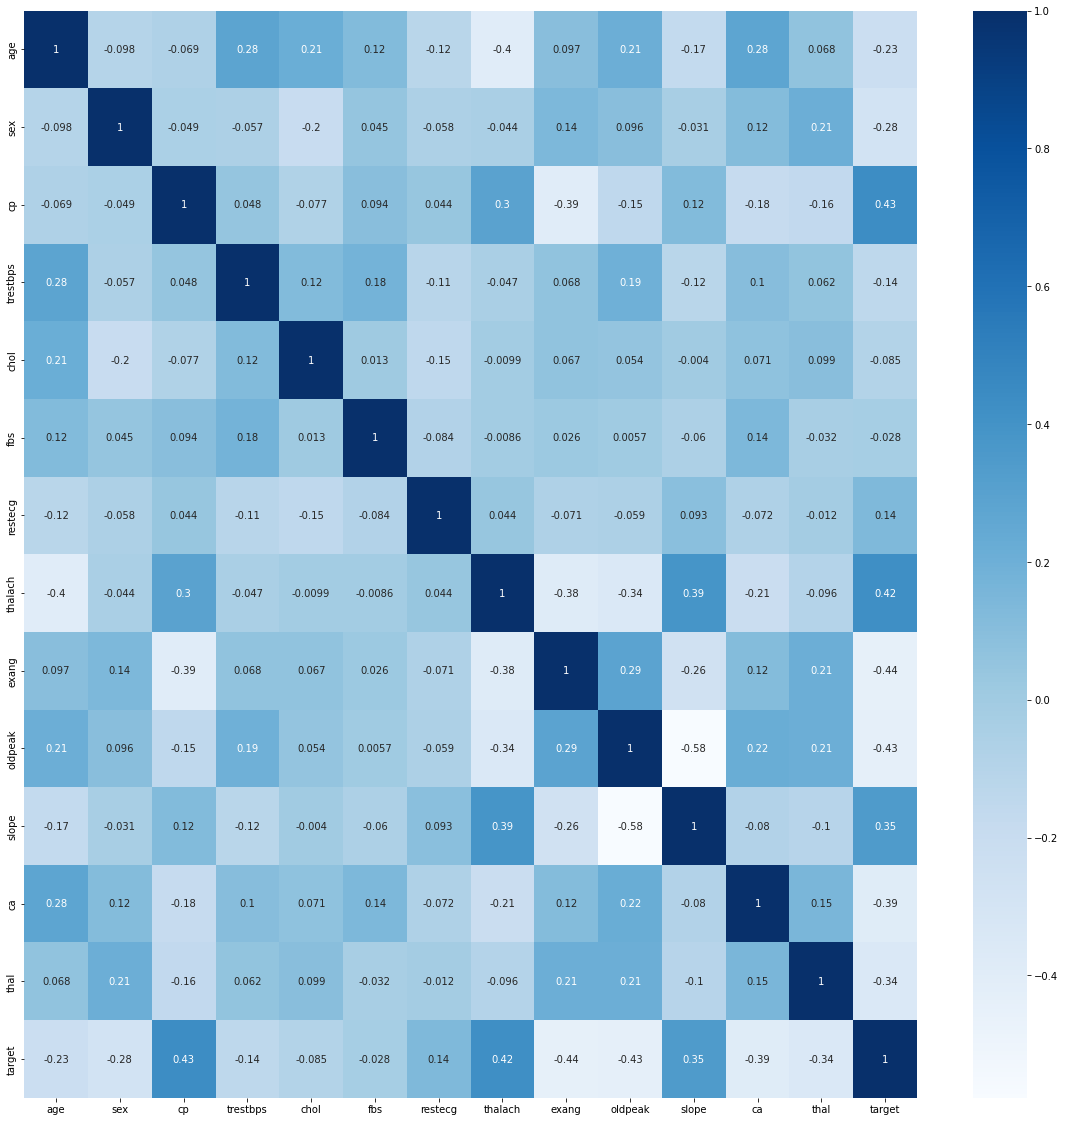

In [10]:
plt.subplots(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap='Blues')
plt.show()

#### Target counts:

In [11]:
heart.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

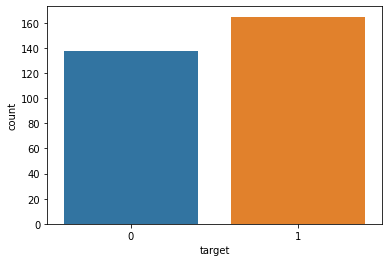

In [12]:
sns.countplot(data=heart,x='target')
plt.show()

#### Age:

<Axes: xlabel='age', ylabel='count'>

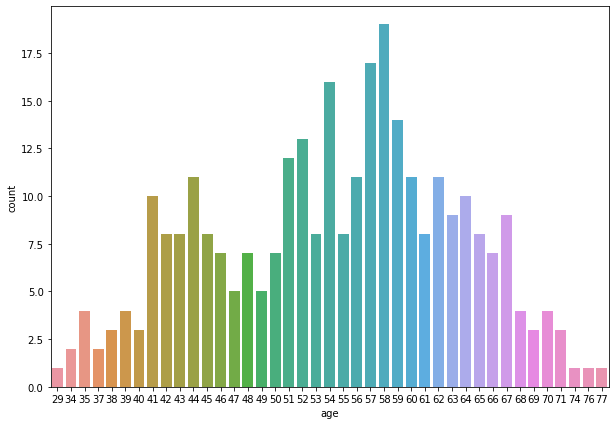

In [13]:
plt.figure(figsize = (10,7))
sns.countplot(data=heart,x='age')

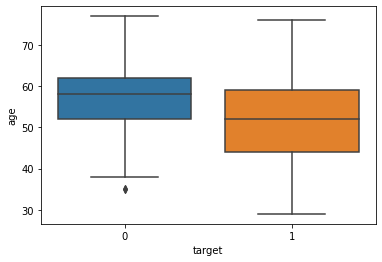

In [14]:
sns.boxplot(x=heart['target'],y=heart['age'])
plt.show()

#### Gender:

<Axes: xlabel='sex', ylabel='count'>

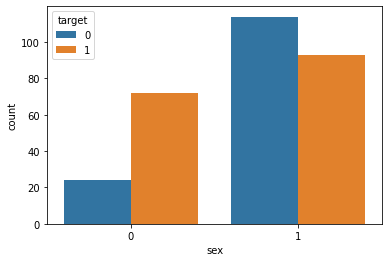

In [15]:
sns.countplot(x='sex',hue='target',data=heart)

#### Seperating Independent & Dependent variables:

In [16]:
x=heart.drop('target',axis=1)
y=heart['target']

#### Splitting data into Train and Test:

In [17]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30,random_state=42)

In [18]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(212, 13) (212,) (91, 13) (91,)


In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#### Logistic Regression:

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs',max_iter=1000)
lr.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [21]:
# Prediction of model:
lr_pred=lr.predict(x_test)

In [22]:
# Confusion matrix:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, lr_pred)

array([[32,  9],
       [ 8, 42]], dtype=int64)

In [23]:
#accuracy score:
from sklearn.metrics import accuracy_score
acc_lr=accuracy_score(y_test, lr_pred)
acc_lr

0.8131868131868132

In [24]:
#Classification report:

from sklearn.metrics import classification_report

print("Classification report of Logistic Regression:\n",classification_report(y_test,lr_pred))

Classification report of Logistic Regression:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



#### Decision Tree:

In [25]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [26]:
# Prediction of model:
dt_pred=dt.predict(x_test)

In [27]:
# Confusion matrix:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, dt_pred)

array([[30, 11],
       [14, 36]], dtype=int64)

In [28]:
#accuracy score:
acc_dt=accuracy_score(y_test, dt_pred)
acc_dt

0.7252747252747253

In [29]:
#Classification report:

from sklearn.metrics import classification_report

print("Classification report of Decision Tree:\n",classification_report(y_test,dt_pred))

Classification report of Decision Tree:
               precision    recall  f1-score   support

           0       0.68      0.73      0.71        41
           1       0.77      0.72      0.74        50

    accuracy                           0.73        91
   macro avg       0.72      0.73      0.72        91
weighted avg       0.73      0.73      0.73        91



#### Random Forest:

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10,criterion='gini',max_depth=7)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=7, n_estimators=10)

In [31]:
# Prediction of model:
rf_pred=rf.predict(x_test)

In [32]:
# Confusion matrix:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, rf_pred)

array([[34,  7],
       [12, 38]], dtype=int64)

In [33]:
#accuracy score:
acc_rf=accuracy_score(y_test, rf_pred)
acc_rf

0.7912087912087912

In [34]:
#Classification report:

from sklearn.metrics import classification_report

print("Classification report of Random Forest:\n",classification_report(y_test,rf_pred))

Classification report of Random Forest:
               precision    recall  f1-score   support

           0       0.74      0.83      0.78        41
           1       0.84      0.76      0.80        50

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.80      0.79      0.79        91



#### Support Vector Machine:

In [35]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', random_state = 42)
svm.fit(x_train,y_train)

SVC(kernel='linear', random_state=42)

In [36]:
# Prediction of model:
svm_pred=svm.predict(x_test)

In [37]:
# Confusion matrix:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, svm_pred)

array([[32,  9],
       [ 8, 42]], dtype=int64)

In [38]:
#accuracy score:
acc_svm=accuracy_score(y_test, svm_pred)
acc_svm

0.8131868131868132

In [39]:
#Classification report:

from sklearn.metrics import classification_report

print("Classification report of Random Forest:\n",classification_report(y_test,svm_pred))

Classification report of Random Forest:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



#### Naive-Bayes:

In [40]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [41]:
# Prediction of model:
nb_pred=nb.predict(x_test)

In [42]:
# Confusion matrix:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, nb_pred)

array([[36,  5],
       [10, 40]], dtype=int64)

In [43]:
#accuracy score:
acc_nb=accuracy_score(y_test, nb_pred)
acc_nb

0.8351648351648352

In [44]:
#Classification report:

from sklearn.metrics import classification_report

print("Classification report of Random Forest:\n",classification_report(y_test,nb_pred))

Classification report of Random Forest:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83        41
           1       0.89      0.80      0.84        50

    accuracy                           0.84        91
   macro avg       0.84      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91



#### KNearestNeighbors:

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [52]:
# Prediction of model:
knn_pred=knn.predict(x_test)

In [53]:
# Confusion matrix:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, knn_pred)

array([[33,  8],
       [10, 40]], dtype=int64)

In [54]:
#accuracy score:
acc_knn=accuracy_score(y_test, nb_pred)
acc_knn

0.8351648351648352

In [55]:
#Classification report:

from sklearn.metrics import classification_report

print("Classification report of Random Forest:\n",classification_report(y_test,knn_pred))

Classification report of Random Forest:
               precision    recall  f1-score   support

           0       0.77      0.80      0.79        41
           1       0.83      0.80      0.82        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



#### Plotting the Accuracy of the models:

Text(0.5, 1.0, 'Model Accuracy')

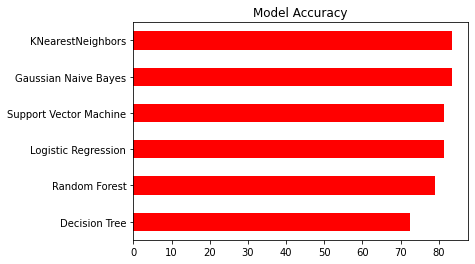

In [56]:
model=pd.Series(data=[acc_lr*100,acc_dt*100,acc_rf*100,acc_svm*100,acc_nb*100,acc_knn*100],
index=['Logistic Regression',
        'Decision Tree',
        'Random Forest',
     'Support Vector Machine',
       'Gaussian Naive Bayes',
       'KNearestNeighbors'])

model.sort_values().plot.barh(color='r')
plt.title('Model Accuracy')

## Hence  KNearestNeighbors and Gaussian Naive Bayes works the best for this dataset.